Exercises
Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import acquire as acq

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
#another way to load `iris` dataset
from pydataset import data

from sklearn.preprocessing import StandardScaler

# 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1a. Choose features other than the ones used in the lesson.

In [7]:
# define independent variables for k-means
# this is creating a 2col df of the features

X = iris[['petal_width', 'sepal_width']]
X.head(3)

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2


In [9]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [10]:
X_scaled.head()

,petal_width,sepal_width
0,-1.315444,1.019004
1,-1.315444,-0.131979
2,-1.315444,0.328414
3,-1.315444,0.098217
4,-1.315444,1.249201


In [11]:

#define the thing
kmeans = KMeans(n_clusters=4)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 1, 2, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3], dtype=int32)

In [12]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,1


In [13]:
X_scaled.head()

,petal_width,sepal_width,cluster
0,-1.315444,1.019004,2
1,-1.315444,-0.131979,2
2,-1.315444,0.328414,2
3,-1.315444,0.098217,2
4,-1.315444,1.249201,1


In [14]:
# Cluster Centers aka centroids. The output is scaled!!
kmeans.cluster_centers_

array([[ 0.1941248 , -1.03317533],
       [-1.23317418,  1.82469303],
       [-1.26757805,  0.46095159],
       [ 0.9710555 ,  0.07690277]])

In [15]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,0.194125,-1.033175
1,-1.233174,1.824693
2,-1.267578,0.460952
3,0.971055,0.076903


In [17]:
#create a DF of the centroids by finding the 
#mean of x & y variables.
# Centriods for unscaled data?

centroids = iris.groupby('cluster')['petal_width', 'sepal_width'].mean()
centroids

,petal_width,sepal_width
cluster,,
0,1.346809,2.608511
1,0.262500,3.850000
2,0.236364,3.257576
3,1.937037,3.090741


# 1b. Visualize the results of your clustering.

In [19]:
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,cluster_2
1,4.9,3.0,1.4,0.2,setosa,cluster_2
2,4.7,3.2,1.3,0.2,setosa,cluster_2
3,4.6,3.1,1.5,0.2,setosa,cluster_2
4,5.0,3.6,1.4,0.2,setosa,cluster_1


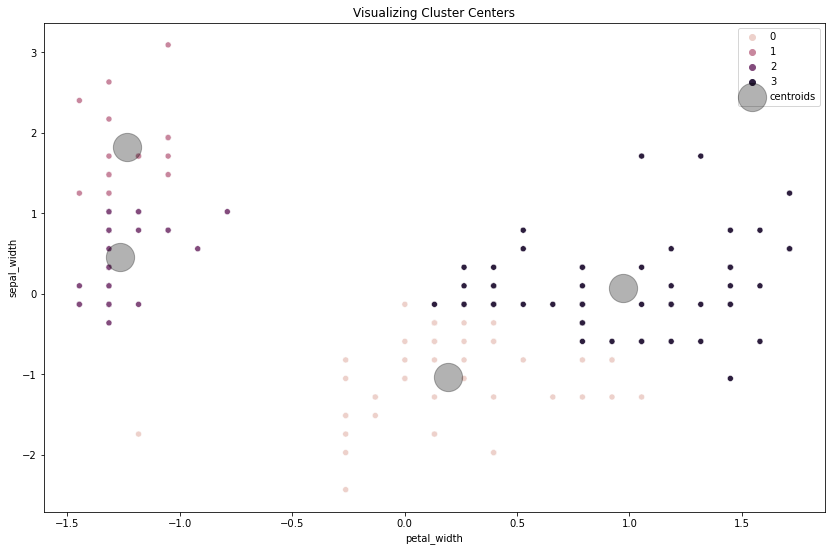

In [20]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

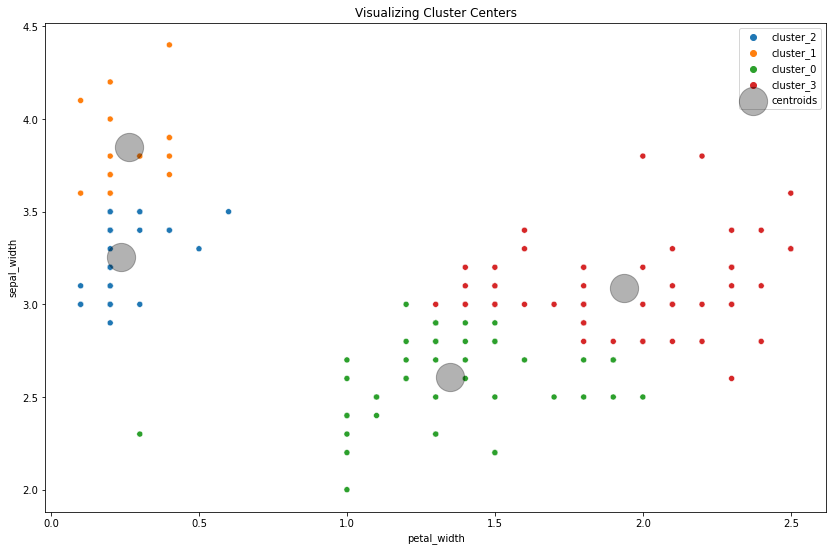

In [22]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_width', data = iris, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'o', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

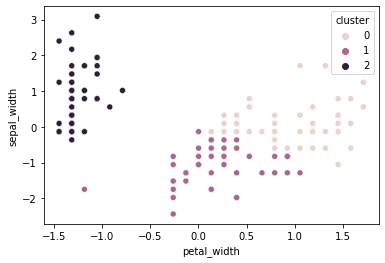

In [23]:
# lets look at 3 clusters (i.e k = 3)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

# 1c. Use the elbow method to visually select a good value for `k`.

In [24]:
X_scaled.head()

,petal_width,sepal_width,cluster
0,-1.315444,1.019004,2
1,-1.315444,-0.131979,2
2,-1.315444,0.328414,2
3,-1.315444,0.098217,2
4,-1.315444,1.249201,2


In [25]:
X = iris[['petal_width', 'sepal_width']]
#from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [26]:
X_scaled.head()

,petal_width,sepal_width
0,-1.315444,1.019004
1,-1.315444,-0.131979
2,-1.315444,0.328414
3,-1.315444,0.098217
4,-1.315444,1.249201


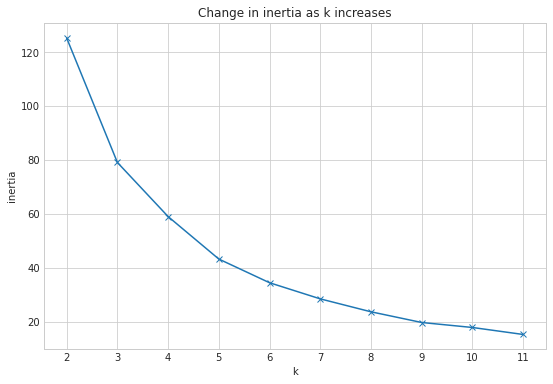

In [27]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

# 1d. Repeat the clustering, this time with 3 different features.

<AxesSubplot:>

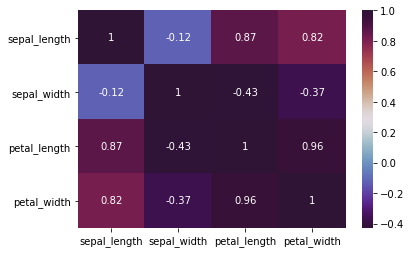

In [28]:
sns.heatmap(iris.corr(), cmap='twilight_shifted', annot=True)

In [3]:
X = iris[['petal_width', 'sepal_length', 'petal_length']]
X.head(3)

,petal_width,sepal_length,petal_length
0,0.2,5.1,1.4
1,0.2,4.9,1.4
2,0.2,4.7,1.3


In [4]:
# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [5]:
X_scaled.head(2)

,petal_width,sepal_length,petal_length
0,-1.315444,-0.900681,-1.340227
1,-1.315444,-1.143017,-1.340227


In [6]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [7]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)

In [8]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,cluster_0
1,4.9,3.0,1.4,0.2,setosa,cluster_0


In [9]:
X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = 'cluster_' + X_scaled.cluster.astype(str)
X_scaled.head()

,petal_width,sepal_length,petal_length,cluster
0,-1.315444,-0.900681,-1.340227,cluster_0
1,-1.315444,-1.143017,-1.340227,cluster_0
2,-1.315444,-1.385353,-1.397064,cluster_0
3,-1.315444,-1.506521,-1.283389,cluster_0
4,-1.315444,-1.021849,-1.340227,cluster_0


In [10]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[-1.23543258, -1.01709736, -1.28450356],
       [ 1.10209314,  1.22418953,  1.07744354],
       [ 0.3072628 ,  0.02896887,  0.36783615]])

In [11]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_length,petal_length
0,-1.235433,-1.017097,-1.284504
1,1.102093,1.224190,1.077444
2,0.307263,0.028969,0.367836


In [12]:
# Centriods for unscaled data

centroids = iris.groupby('cluster')['petal_width', 'sepal_length', 'petal_length'].mean()
centroids

,petal_width,sepal_length,petal_length
cluster,,,
cluster_0,0.260784,5.003922,1.498039
cluster_1,2.036585,6.853659,5.653659
cluster_2,1.432759,5.867241,4.405172


In [16]:
X_scaled.head()

,petal_width,sepal_length,petal_length,cluster
0,-1.315444,-0.900681,-1.340227,cluster_0
1,-1.315444,-1.143017,-1.340227,cluster_0
2,-1.315444,-1.385353,-1.397064,cluster_0
3,-1.315444,-1.506521,-1.283389,cluster_0
4,-1.315444,-1.021849,-1.340227,cluster_0


In [13]:
def create_scatter_plot(x,y,train,kmeans, X_scaled, scaler):
    # takes in x and y (variable names as strings, along with returned objects from previous
    # fuction create_cluster and creates a plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x = x, y = y, data = train, hue = 'cluster')
    centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X_scaled.columns)
    centroids.plot.scatter(y=y, x= x, ax=plt.gca(), alpha=.30, s=500, c='black')

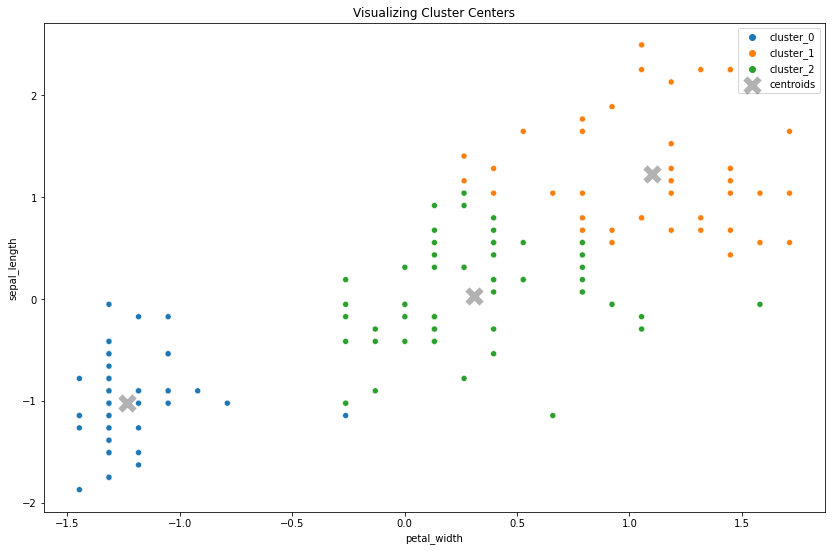

In [18]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'sepal_length', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers')
plt.legend();

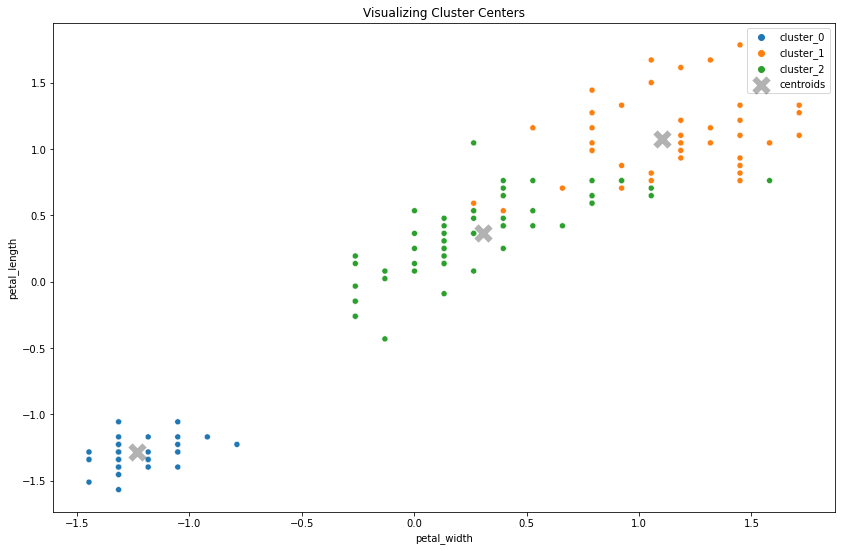

In [19]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y = 'petal_length', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'petal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers')
plt.legend();

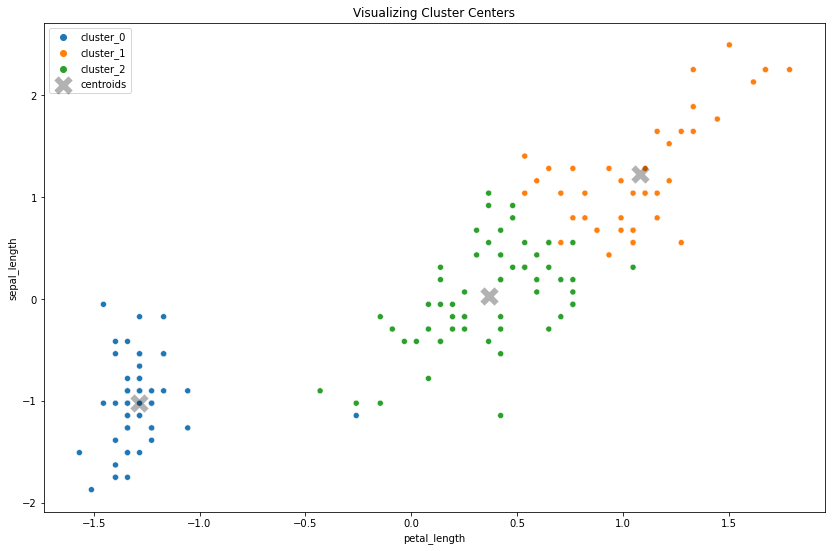

In [20]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_length', y = 'sepal_length', ax = plt.gca(), color ='k', alpha = 0.3, s = 200, marker = 'x', label = 'centroids', lw=6)

plt.title('Visualizing Cluster Centers')
plt.legend();

# 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [2]:
mall = acq.get_mall()

In [3]:
mall.head(2)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81


<AxesSubplot:>

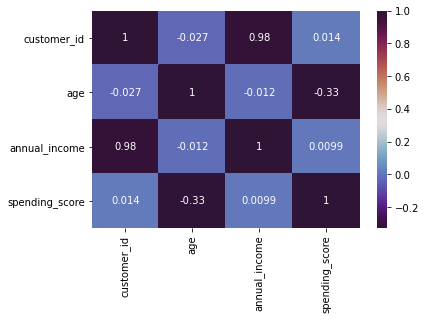

In [4]:
sns.heatmap(mall.corr(), cmap='twilight_shifted', annot=True)

In [5]:
#define features for kmeans

X = mall[['age', 'spending_score']]
X.head(2)

,age,spending_score
0,19,39
1,21,81


In [6]:
# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [7]:
X_scaled.head(2)

,age,spending_score
0,-1.424569,-0.434801
1,-1.281035,1.195704


In [8]:
#define the thing
kmeans = KMeans(n_clusters=3)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [9]:
# append new col to mall & X_scaled
mall['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [10]:
mall.head(2)

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1


In [11]:
X_scaled.head(2)

,age,spending_score,cluster
0,-1.424569,-0.434801,2
1,-1.281035,1.195704,1


In [12]:
# Cluster Centers aka centroids. The output is scaled!!

kmeans.cluster_centers_

array([[ 1.23658636, -0.38408299],
       [-0.72740666,  0.9160964 ],
       [-0.28826287, -0.98405467]])

In [13]:
# convert to a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,spending_score
0,1.236586,-0.384083
1,-0.727407,0.916096
2,-0.288263,-0.984055


In [15]:
# Centriods for unscaled data

centroids = mall.groupby('cluster')['age', 'spending_score'].mean()
centroids

,age,spending_score
cluster,,
0,56.080645,40.306452
1,28.714286,73.797619
2,34.833333,24.851852


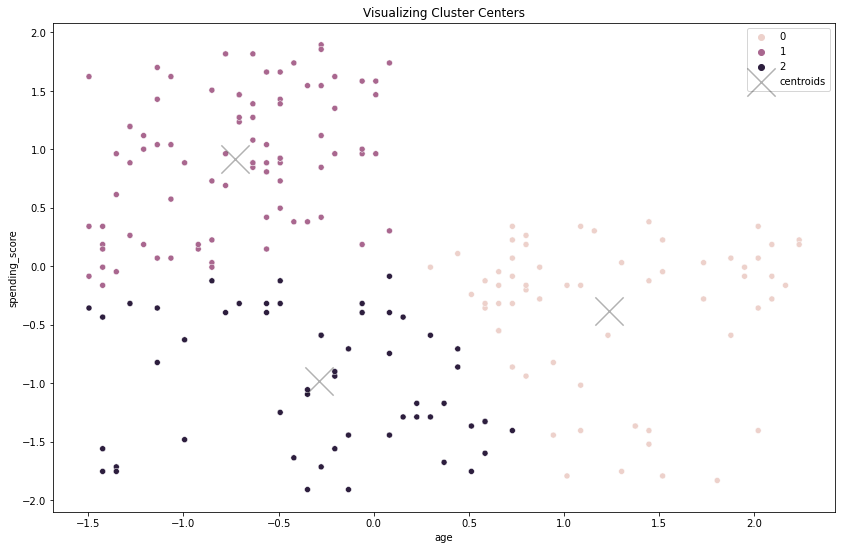

In [16]:

# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'spending_score', data = X_scaled, hue = 'cluster')


# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'spending_score', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'x', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

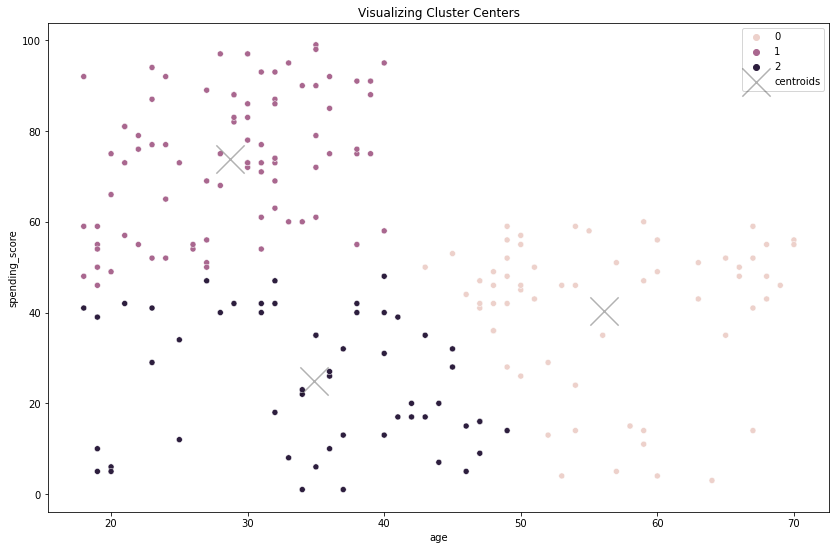

In [18]:
# viz on unscaled data

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y = 'spending_score', data = mall, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'spending_score', ax = plt.gca(), color ='k', alpha = 0.3, s = 800, marker = 'x', label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

# 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [19]:
X = mall[['age', 'spending_score']]

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

189.3874903399244

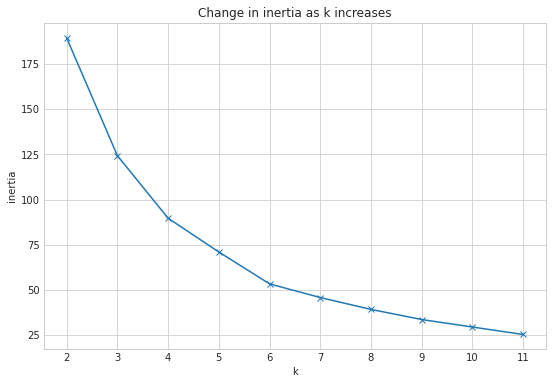

In [20]:
# lets plot inertia vs k

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')